# Test notebook for Arrowplots

In [1]:
# import general libraries
import numpy as np
import matplotlib.pyplot as plt
# import from the file multiplayer_prisoners_dilemma.py
from multiplayer_prisoners_dilemma import QLearningAgent
from multiplayer_prisoners_dilemma import Game
from multiplayer_prisoners_dilemma import Simulation

# define the reward function for the two player prisoner's dilemma
def reward_matrix_for_two_player_PD(action_vector, player_id):
    action_tuple = tuple(action_vector)
    S, P, R, T = 0, 1, 3, 5
    reward_matrix = {
            (0, 0): (R, R),  # Both cooperate
            (0, 1): (S, T),  # Agent A cooperates, agent B defects
            (1, 0): (T, S),  # Agent A defects, agent B cooperates
            (1, 1): (P, P),  # Both defect
        }
    reward = reward_matrix[action_tuple]
    return reward[player_id]

# define the reward function for the two player prisoner's dilemma
def reward_matrix_for_two_player_matching_pennies(action_vector, player_id):
    action_tuple = tuple(action_vector)
    W, L = 1, -1
    reward_matrix = {
            (0, 0): (W, L),  
            (0, 1): (L, W),  
            (1, 0): (L, W),  
            (1, 1): (W, L),  
        }
    reward = reward_matrix[action_tuple]
    return reward[player_id]

# define the reward function for the two player battle of sexes
def reward_matrix_for_two_player_Stag_Hunt(action_vector, player_id):
    action_tuple = tuple(action_vector)
    reward_matrix = {
            (0, 0): (4, 4),  # Both defect
            (0, 1): (1, 3),  # Agent A defects, agent B cooperates
            (1, 0): (3, 1),  # Agent A cooperates, agent B defects
            (1, 1): (3, 3),  # Both cooperate
        }
    reward = reward_matrix[action_tuple]
    return reward[player_id]

# define the reward function for the two player battle of sexes
def reward_matrix_for_two_player_battle_of_sexes(action_vector, player_id):
    action_tuple = tuple(action_vector)
    reward_matrix = {
            (0, 0): (3, 2),  # Both defect
            (0, 1): (0, 0),  # Agent A defects, agent B cooperates
            (1, 0): (0, 0),  # Agent A cooperates, agent B defects
            (1, 1): (2, 3),  # Both cooperate
        }
    reward = reward_matrix[action_tuple]
    return reward[player_id]

# game parameters
num_players = 2
action_space = np.array([0 ,  1], dtype=float) # (0 = defect, 1 = cooperate)
observation_length = 0 # number of previous actions that are considered in the observation vector (0 = only current action)
use_prefactor = False

# define the agents
agent_pair = [QLearningAgent, QLearningAgent]
discount_factor = 0.
learning_rate = 0.01
#learning_rate_adjustment = 0.1
selection_method = "Boltzmann" 
initial_q_tables = [np.array([[0, 0]], dtype=float) for i in range(num_players)]

figsize = (4,4)
cmap = None#"plasma"
dpi = 200
filetype = "jpg"

# Prisoner's Dilemma

Initial guess: [0, 0], Solution: (0.227, 0.227)
Initial guess: [0.3333333333333333, 0.3333333333333333], Solution: (0.227, 0.227)
Initial guess: [0.5, 0.5], Solution: (0.227, 0.227)
Initial guess: [0.6666666666666666, 0.6666666666666666], Solution: (0.227, 0.227)
Initial guess: [1, 1], Solution: (0.227, 0.227)


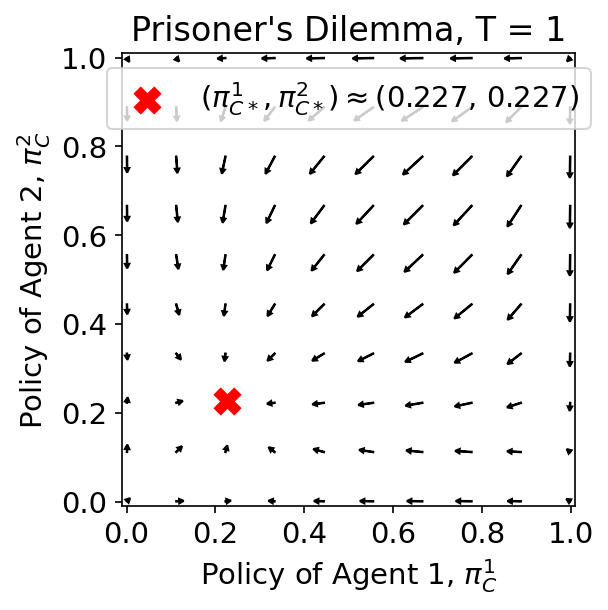

In [2]:
# choose the game and temperature
reward_func = reward_matrix_for_two_player_PD
temperature = 1
title = f"Prisoner's Dilemma, T = {temperature}"
axislabel = "C"

# Create a list of agents
agents = [agent_pair[i](player_id = i, 
                action_space = action_space,
                num_players = num_players,
                discount_factor = discount_factor,
                observation_length = observation_length,
                selection_method = selection_method,
                reward_func = reward_func,
                temperature = temperature,
                learning_rate = learning_rate,
                q_table = initial_q_tables[i],
                use_prefactor = use_prefactor
                )       
                for i in range(num_players)]

# Create a game and a Simulation
game = Game(agents = agents)
simulation = Simulation()

# generate arrow probabilities for the complete 1x1 square with a step size of 0.01
x = np.linspace(0.001, 0.999, 10)
initial_arrow_probabilities = [(x[i], x[j]) for i in range(len(x)) for j in range(len(x))]
simulation.arrowplot(agents, initial_arrow_probabilities=initial_arrow_probabilities, cmap=cmap, save_path=f"Figures/arrowplots/PD_T_{temperature}.{filetype}", figsize=figsize, marker_size=100, title=title, axislabel=axislabel)


# Matching Pennies

Initial guess: [0, 0], Solution: (0.5, 0.5)
Initial guess: [0.3333333333333333, 0.3333333333333333], Solution: (0.5, 0.5)
Initial guess: [0.5, 0.5], Solution: (0.5, 0.5)
Initial guess: [0.6666666666666666, 0.6666666666666666], Solution: (0.5, 0.5)
Initial guess: [1, 1], Solution: (0.5, 0.5)


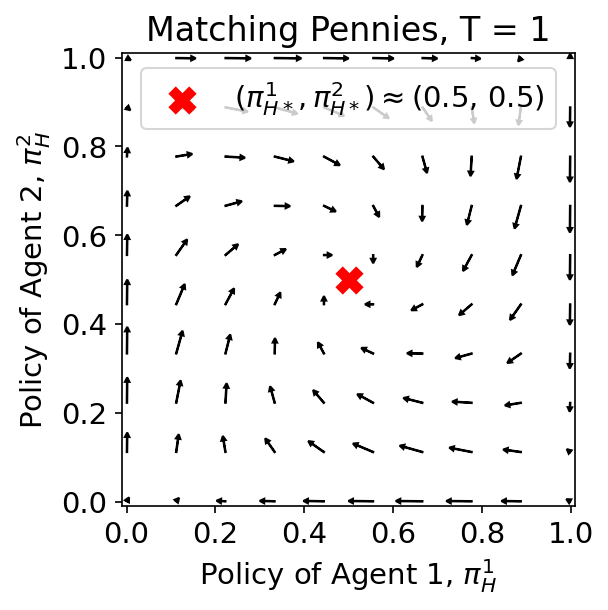

In [3]:
# choose the game and temperature
reward_func = reward_matrix_for_two_player_matching_pennies
temperature = 1
title = f"Matching Pennies, T = {temperature}"
axislabel = "H"

# Create a list of agents
agents = [agent_pair[i](player_id = i, 
                action_space = action_space,
                num_players = num_players,
                discount_factor = discount_factor,
                observation_length = observation_length,
                selection_method = selection_method,
                reward_func = reward_func,
                temperature = temperature,
                learning_rate = learning_rate,
                q_table = initial_q_tables[i],
                use_prefactor = use_prefactor
                )       
                for i in range(num_players)]

# Create a game and a Simulation
game = Game(agents = agents)
simulation = Simulation()

# generate arrow probabilities for the complete 1x1 square with a step size of 0.01
x = np.linspace(0.001, 0.999, 10)
initial_arrow_probabilities = [(x[i], x[j]) for i in range(len(x)) for j in range(len(x))]
simulation.arrowplot(agents, initial_arrow_probabilities=initial_arrow_probabilities, cmap=cmap, save_path=f"Figures/arrowplots/MP_T_{temperature}.{filetype}", figsize=figsize, title=title, axislabel=axislabel)


# Stag Hunt

Initial guess: [0, 0], Solution: (0.196, 0.196)
Initial guess: [0.3333333333333333, 0.3333333333333333], Solution: (0.196, 0.196)
Initial guess: [0.5, 0.5], Solution: (0.196, 0.196)
Initial guess: [0.6666666666666666, 0.6666666666666666], Solution: (0.196, 0.196)
Initial guess: [1, 1], Solution: (0.196, 0.196)


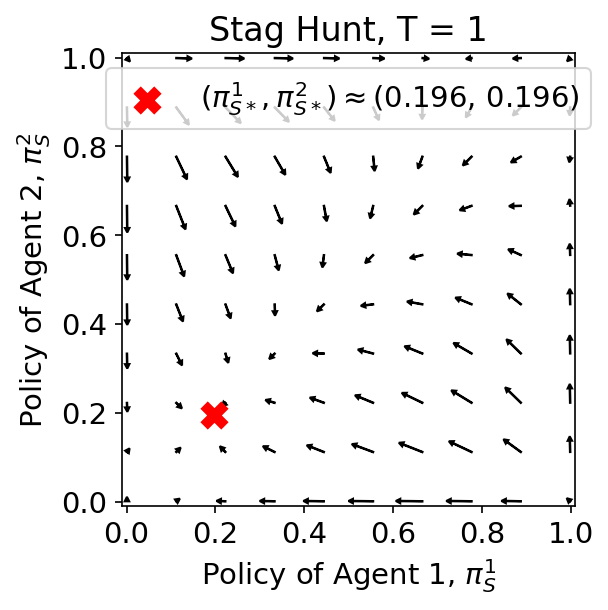

In [4]:
# choose the game and temperature
reward_func = reward_matrix_for_two_player_Stag_Hunt
temperature = 1
title = f"Stag Hunt, T = {temperature}"
axislabel = "S"

# Create a list of agents
agents = [agent_pair[i](player_id = i, 
                action_space = action_space,
                num_players = num_players,
                discount_factor = discount_factor,
                observation_length = observation_length,
                selection_method = selection_method,
                reward_func = reward_func,
                temperature = temperature,
                learning_rate = learning_rate,
                q_table = initial_q_tables[i],
                use_prefactor = use_prefactor
                )       
                for i in range(num_players)]

# Create a game and a Simulation
game = Game(agents = agents)
simulation = Simulation()

# generate arrow probabilities for the complete 1x1 square with a step size of 0.01
x = np.linspace(0.001, 0.999, 10)
initial_arrow_probabilities = [(x[i], x[j]) for i in range(len(x)) for j in range(len(x))]

simulation.arrowplot(agents, initial_arrow_probabilities=initial_arrow_probabilities, cmap=cmap, save_path=f"Figures/arrowplots/SH_T_{temperature}.{filetype}", figsize=figsize, title=title, axislabel=axislabel)

# Bach or Stravinsky

Initial guess: [0, 0], Solution: (0.195, 0.117)
Initial guess: [0.3333333333333333, 0.3333333333333333], Solution: (0.195, 0.117)
Initial guess: [0.5, 0.5], Solution: (0.555, 0.445)
Initial guess: [0.6666666666666666, 0.6666666666666666], Solution: (0.883, 0.805)
Initial guess: [1, 1], Solution: (0.883, 0.805)


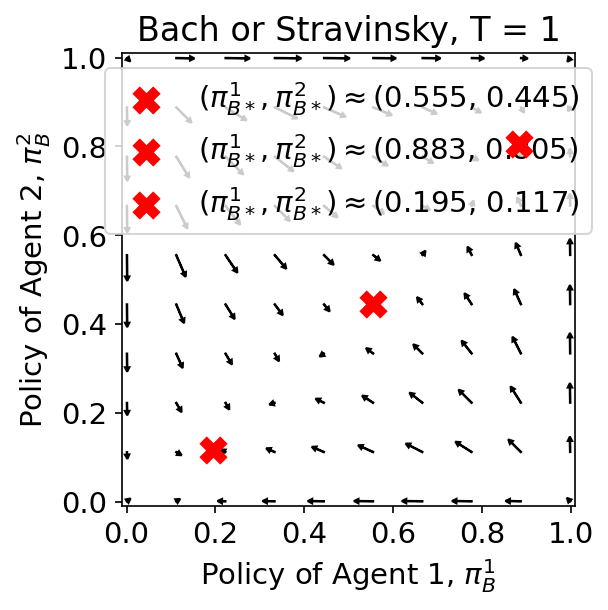

In [5]:
# choose the game and temperature
reward_func = reward_matrix_for_two_player_battle_of_sexes
temperature = 1
title = f"Bach or Stravinsky, T = {temperature}"
axislabel = "B"

# Create a list of agents
agents = [agent_pair[i](player_id = i, 
                action_space = action_space,
                num_players = num_players,
                discount_factor = discount_factor,
                observation_length = observation_length,
                selection_method = selection_method,
                reward_func = reward_func,
                temperature = temperature,
                learning_rate = learning_rate,
                q_table = initial_q_tables[i],
                use_prefactor = use_prefactor
                )       
                for i in range(num_players)]

# Create a game and a Simulation
game = Game(agents = agents)
simulation = Simulation()

# generate arrow probabilities for the complete 1x1 square with a step size of 0.01
x = np.linspace(0.001, 0.999, 10)
initial_arrow_probabilities = [(x[i], x[j]) for i in range(len(x)) for j in range(len(x))]

simulation.arrowplot(agents, initial_arrow_probabilities=initial_arrow_probabilities, cmap=cmap, save_path=f"Figures/arrowplots/BS_T_{temperature}.{filetype}", figsize=figsize, title=title, axislabel=axislabel)